In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 95% !important; }</style>"))

In [2]:
# 한글폰트
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'NanumGothic'

## 1. 데이터 가져오기

In [1]:
import pandas as pd

data = pd.read_csv('train.csv')
data.rename({'전화해지여부':'target'}, axis=1, inplace=True)
data

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,target
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


## 2. 가입일로 나눈 컬럼들 생성

In [3]:
new_df = data.copy()
for column in data.iloc[:,2:-1].columns:
    colname = column+'_per'
    new_df[colname] = new_df[column]/new_df['가입일']
new_df

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,...,주간통화시간_per,주간통화횟수_per,주간통화요금_per,저녁통화시간_per,저녁통화횟수_per,저녁통화요금_per,밤통화시간_per,밤통화횟수_per,밤통화요금_per,상담전화건수_per
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,...,0.301520,0.282675,0.082979,0.817021,0.206687,0.087903,0.799088,0.996960,0.099970,0.006079
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,...,161.950000,161.500000,41.850000,134.700000,163.000000,16.045000,161.400000,104.500000,16.160000,1.000000
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,...,3.036559,3.473118,0.367742,2.225806,3.462366,0.352903,3.019355,3.526882,0.089032,0.000000
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,...,0.992825,1.000000,0.112556,1.044843,0.273543,0.107175,0.913901,1.049327,0.041973,0.000000
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,...,0.433784,1.000000,0.129279,1.008559,0.310811,0.126486,1.185135,1.004505,0.012613,0.036036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,...,1.101141,0.764259,0.082890,1.066540,1.228137,0.113612,0.790875,0.250951,0.035285,0.007605
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,...,0.744523,0.989399,0.319788,1.003887,0.713781,0.115901,1.016961,0.717314,0.022191,0.007067
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,...,9.266667,1.375000,0.920833,9.745833,1.333333,0.925833,12.233333,3.958333,0.175833,0.083333
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,...,4.165079,3.206349,0.469841,4.453968,4.476190,0.458413,4.458730,3.285714,0.331429,0.031746


## 3. 사분위수 마다 target 0/1 비율 보기

In [3]:
# 2. 사분위수로 나눠서 살펴보기
new_dfq = new_df.copy()

def qrize(x):
    if x <= q1:
        return 0
    elif x <= q2:
        return 1
    elif x <= q3:
        return 2
    else:
        return 3


for column in new_df.iloc[:,-11:].columns:
    q1 = new_df[column].quantile(.25)
    q2 = new_df[column].quantile(.5)
    q3 = new_df[column].quantile(.75)
    new_dfq[column] = new_df[column].apply(qrize)
new_dfq.iloc[:,-13:]

,상담전화건수,target,음성사서함이용_per,주간통화시간_per,주간통화횟수_per,주간통화요금_per,저녁통화시간_per,저녁통화횟수_per,저녁통화요금_per,밤통화시간_per,밤통화횟수_per,밤통화요금_per,상담전화건수_per
0,2,0,0,0,0,0,0,0,0,0,1,2,0
1,2,0,3,3,3,3,3,3,3,3,3,3,3
2,0,0,3,2,3,2,2,3,2,2,3,1,0
3,0,0,1,0,1,0,1,0,1,0,2,1,0
4,8,0,0,0,1,1,0,0,1,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,2,0,3,1,1,0,1,2,1,0,0,1,1
30196,2,0,3,0,1,2,0,1,1,0,1,0,1
30197,2,0,0,3,2,3,3,2,3,3,3,3,3
30198,2,1,2,2,3,2,2,3,3,2,3,3,2


음성사서함이용_per
주간통화시간_per
주간통화횟수_per
주간통화요금_per
저녁통화시간_per
저녁통화횟수_per
저녁통화요금_per
밤통화시간_per
밤통화횟수_per
밤통화요금_per
상담전화건수_per


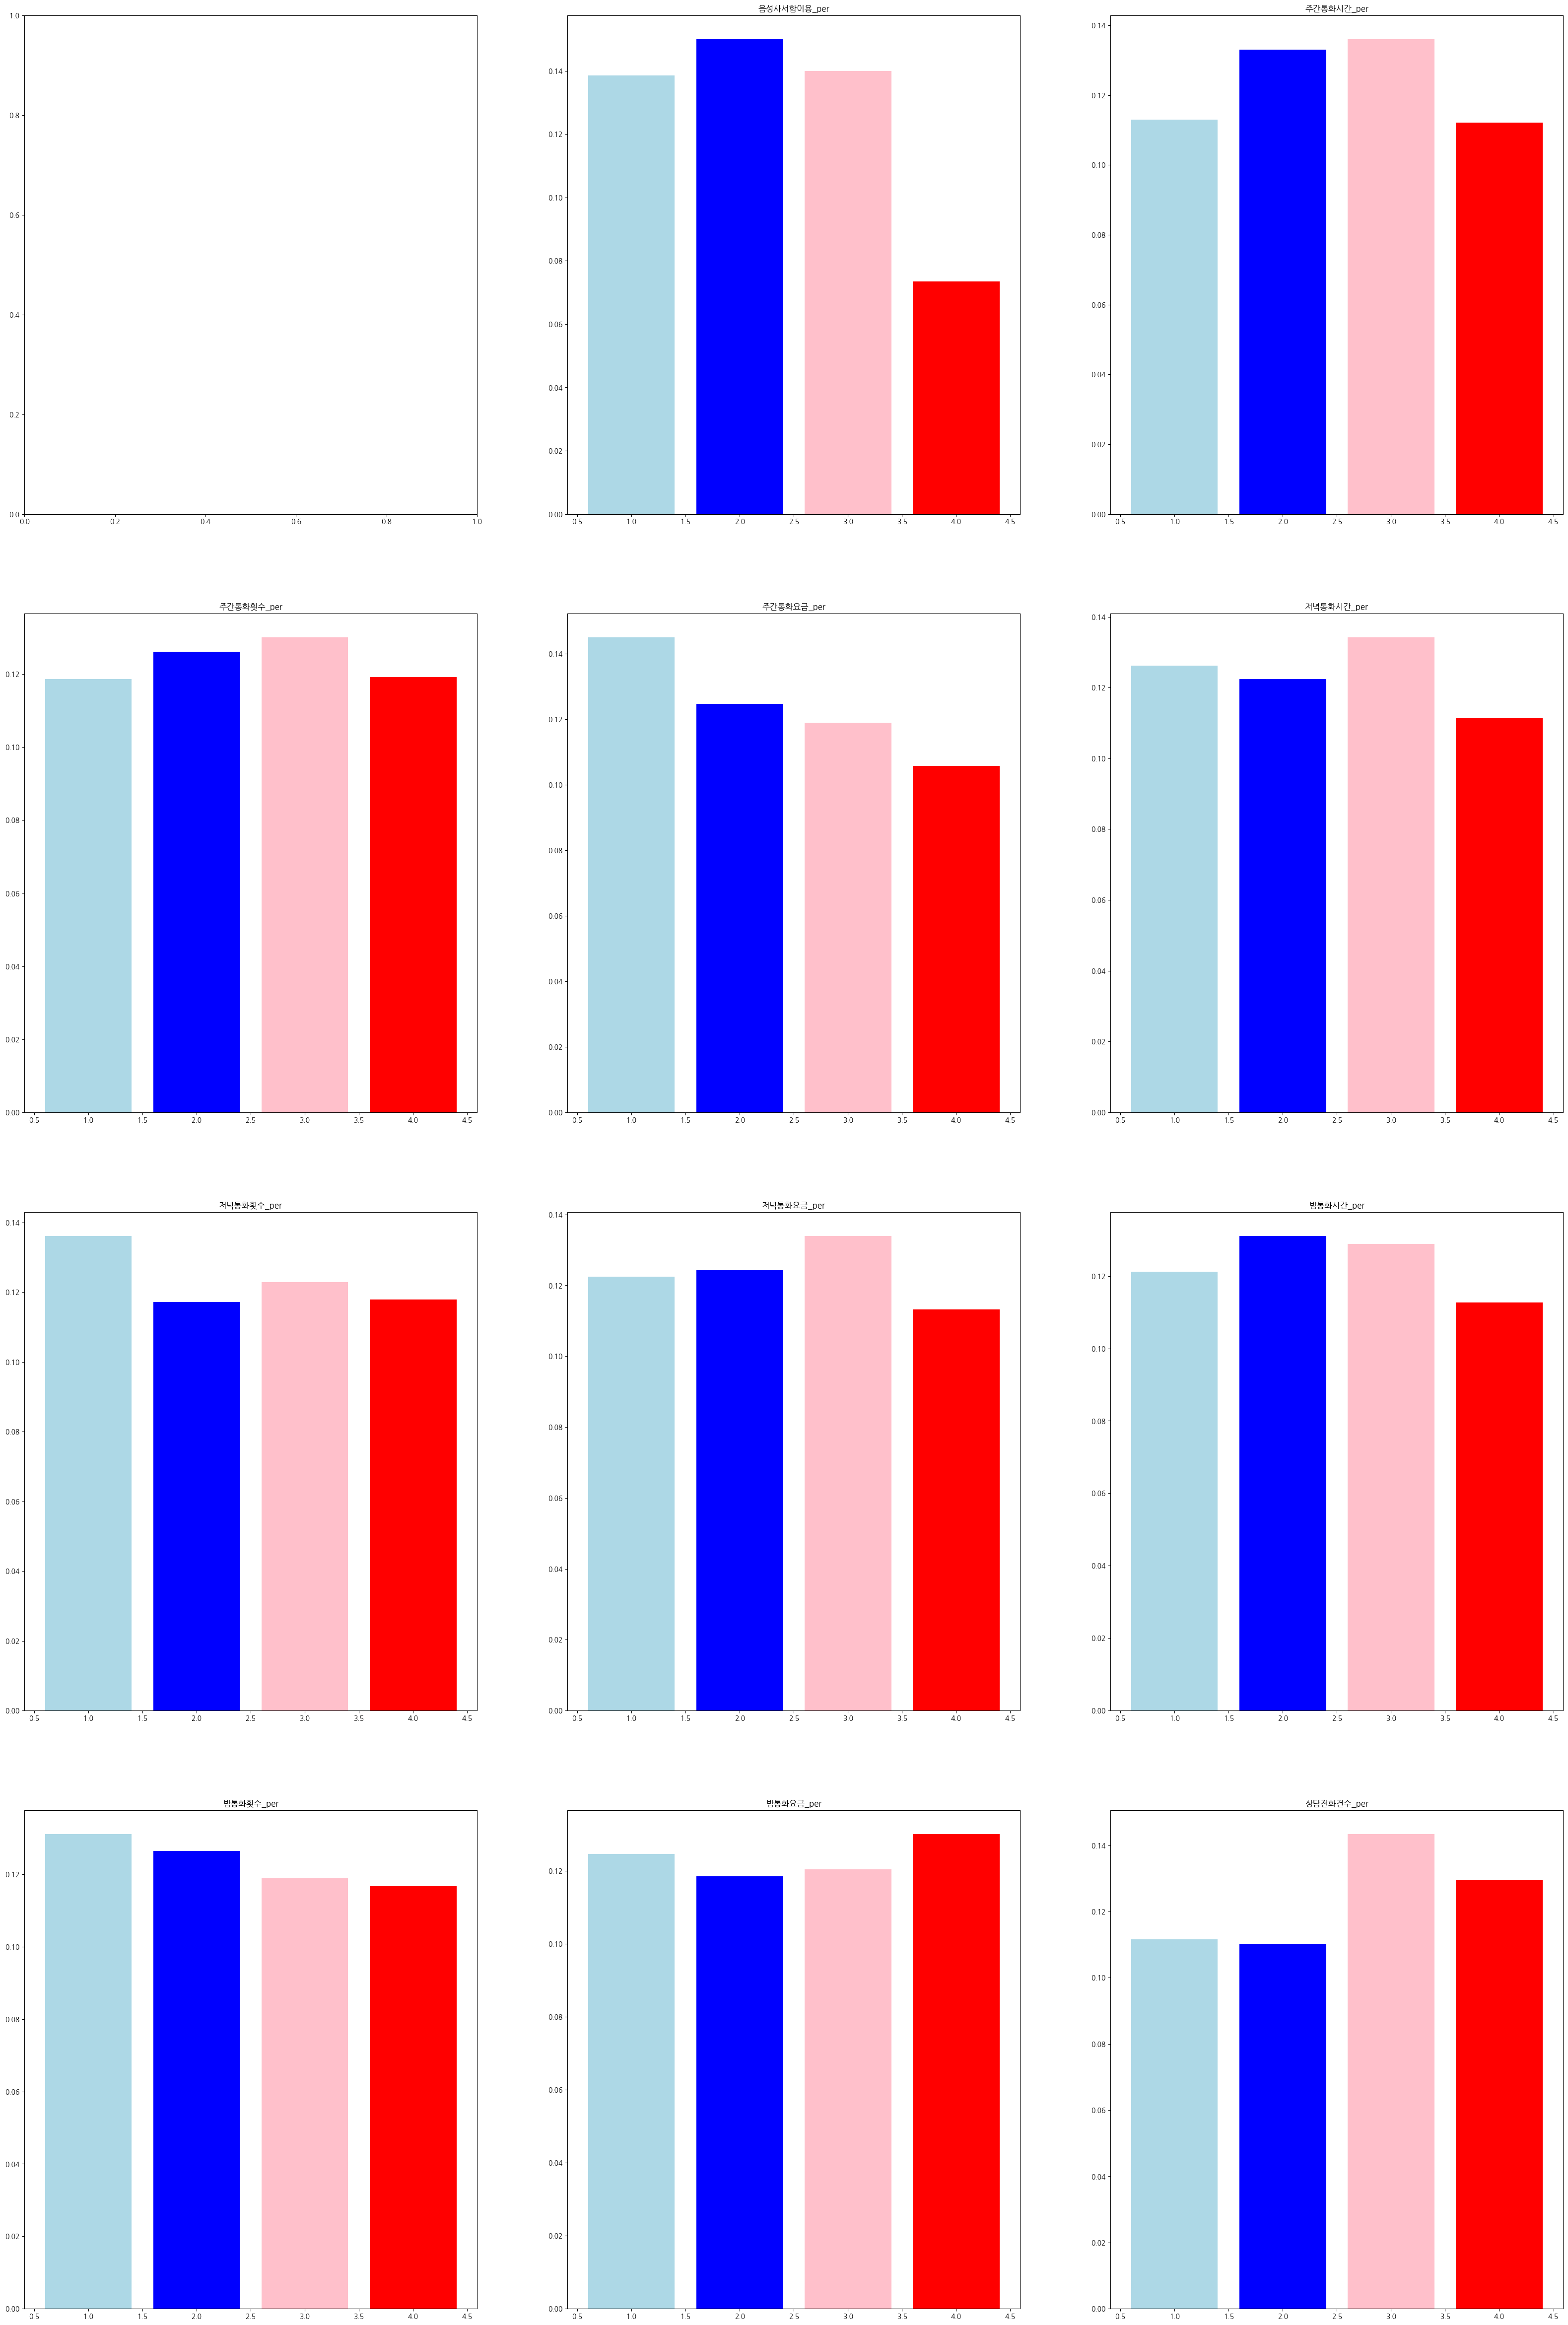

In [8]:
# 1. 전체 변수이용
import matplotlib.pyplot as plt

# 3x4 subplot 그리기
fig, axs = plt.subplots(4, 3, figsize=(40, 60))
i, j = 0, 1
for column in new_df.iloc[:,-11:].columns:
    print(column)
    
    # 계약해지/계약유지 비율
    axs[i,j].set_title(f'{column}')
    axs[i,j].bar([1], new_df[new_dfq[column]==0]['target'].value_counts()[1]/new_df[new_dfq[column]==0]['target'].value_counts()[0], color='lightblue')
    axs[i,j].bar([2], new_df[new_dfq[column]==1]['target'].value_counts()[1]/new_df[new_dfq[column]==1]['target'].value_counts()[0], color='blue')
    axs[i,j].bar([3], new_df[new_dfq[column]==2]['target'].value_counts()[1]/new_df[new_dfq[column]==2]['target'].value_counts()[0], color='pink')
    axs[i,j].bar([4], new_df[new_dfq[column]==3]['target'].value_counts()[1]/new_df[new_dfq[column]==3]['target'].value_counts()[0], color='red')
    j += 1
    if j == 3:
        j = 0
        i += 1
    

plt.show()

## 4. 모델적합 1
+ 이상치제거 없이
+ 모든 변수 적합

In [4]:


# 라이브러리를 불러옵니다.
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# 독립 변수와 종속 변수를 분리합니다.
X = data.drop(['ID','target'], axis=1)
y = data['target']

# 데이터를 학습 데이터와 테스트 데이터로 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE 객체를 생성합니다.
smote = SMOTE(random_state=42, sampling_strategy=1)

# 학습 데이터에 SMOTE를 적용하여 오버샘플링합니다.
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train, )

# 이제 X_train_resampled, y_train_resampled를 사용하여 모델을 학습시킬 수 있습니다.
data_resampled =  X_train_resampled.copy()
data_resampled['target'] = y_train_resampled

test = X_test.copy()
test['target'] = y_test
data_resampled['target'].value_counts()

1    21467
0    21467
Name: target, dtype: int64

In [5]:
new_df2 = data_resampled.copy()
for column in data.iloc[:,2:-1].columns:
    print(column)
    colname = column+'_per'
    new_df2[colname] = new_df2[column]/new_df2['가입일']
    test[colname] = test[column]/test['가입일']
new_df2

음성사서함이용
주간통화시간
주간통화횟수
주간통화요금
저녁통화시간
저녁통화횟수
저녁통화요금
밤통화시간
밤통화횟수
밤통화요금
상담전화건수


,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,...,주간통화시간_per,주간통화횟수_per,주간통화요금_per,저녁통화시간_per,저녁통화횟수_per,저녁통화요금_per,밤통화시간_per,밤통화횟수_per,밤통화요금_per,상담전화건수_per
0,224,1,245.900000,42,49.900000,243.800000,23,24.940000,223.500000,93,...,1.097768,0.187500,0.222768,1.088393,0.102679,0.111339,0.997768,0.415179,0.019643,0.000000
1,263,1,333.300000,63,36.700000,323.900000,93,22.020000,262.200000,223,...,1.267300,0.239544,0.139544,1.231559,0.353612,0.083726,0.996958,0.847909,0.008479,0.007605
2,35,1,233.300000,39,23.300000,224.400000,244,20.440000,204.000000,93,...,6.665714,1.114286,0.665714,6.411429,6.971429,0.584000,5.828571,2.657143,0.259714,0.000000
3,76,1,154.500000,79,27.900000,212.200000,100,17.920000,155.000000,100,...,2.032895,1.039474,0.367105,2.792105,1.315789,0.235789,2.039474,1.315789,0.090921,0.013158
4,222,25,405.000000,225,43.000000,222.900000,224,22.030000,243.900000,204,...,1.824324,1.013514,0.193694,1.004054,1.009009,0.099234,1.098649,0.918919,0.015495,0.009009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42929,224,1,229.090506,31,21.272184,259.880087,36,23.253575,232.726585,22,...,1.022725,0.138393,0.094965,1.160179,0.160714,0.103811,1.038958,0.098214,0.013449,0.000000
42930,84,0,465.366738,444,46.066311,447.730913,404,48.659765,466.255049,96,...,5.540080,5.285714,0.548408,5.330130,4.809524,0.579283,5.550655,1.142857,0.529285,0.047619
42931,288,0,284.353760,208,29.538678,278.922040,80,22.673760,228.616811,209,...,0.987339,0.722222,0.102565,0.968479,0.277778,0.078728,0.793808,0.725694,0.026524,0.000000
42932,288,0,209.816313,201,83.632626,291.330502,202,26.280000,296.254972,230,...,0.728529,0.697917,0.290391,1.011564,0.701389,0.091250,1.028663,0.798611,0.030625,0.000000


In [6]:
test

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,...,주간통화시간_per,주간통화횟수_per,주간통화요금_per,저녁통화시간_per,저녁통화횟수_per,저녁통화요금_per,밤통화시간_per,밤통화횟수_per,밤통화요금_per,상담전화건수_per
3068,282,1,328.2,281,31.6,284.5,88,32.32,323.0,62,...,1.163830,0.996454,0.112057,1.008865,0.312057,0.114610,1.145390,0.219858,0.071206,0.028369
30027,63,1,223.9,223,24.1,293.3,203,26.39,264.4,32,...,3.553968,3.539683,0.382540,4.655556,3.222222,0.418889,4.196825,0.507937,0.036984,0.047619
9375,329,0,93.2,89,30.2,323.7,93,28.20,291.5,33,...,0.283283,0.270517,0.091793,0.983891,0.282675,0.085714,0.886018,0.100304,0.006960,0.024316
28791,209,1,281.1,207,29.3,299.5,329,32.92,282.0,68,...,1.344976,0.990431,0.140191,1.433014,1.574163,0.157512,1.349282,0.325359,0.154450,0.038278
23913,45,1,445.4,408,49.7,450.5,440,48.60,442.3,407,...,9.897778,9.066667,1.104444,10.011111,9.777778,1.080000,9.828889,9.044444,0.907556,0.088889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25739,322,0,329.8,98,84.1,331.3,280,32.32,202.7,282,...,1.024224,0.304348,0.261180,1.028882,0.869565,0.100373,0.629503,0.875776,0.028944,0.006211
1611,222,22,241.8,45,42.1,222.5,92,29.04,205.6,204,...,1.089189,0.202703,0.189640,1.002252,0.414414,0.130811,0.926126,0.918919,0.041577,0.000000
8293,34,29,296.1,225,45.3,223.2,94,22.49,203.2,44,...,8.708824,6.617647,1.332353,6.564706,2.764706,0.661471,5.976471,1.294118,0.271765,0.058824
22492,323,88,68.5,98,34.2,210.1,70,32.28,293.2,32,...,0.212074,0.303406,0.105882,0.650464,0.216718,0.099938,0.907740,0.099071,0.027492,0.006192


In [25]:
new_df2.columns

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수',
       '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', 'target', '음성사서함이용_per',
       '주간통화시간_per', '주간통화횟수_per', '주간통화요금_per', '저녁통화시간_per', '저녁통화횟수_per',
       '저녁통화요금_per', '밤통화시간_per', '밤통화횟수_per', '밤통화요금_per', '상담전화건수_per'],
      dtype='object')

In [7]:

# 라이브러리를 불러옵니다.
from pycaret.classification import *

# 데이터 프레임(df)을 사용하여 환경을 설정합니다.
# 종속 변수(dependent variable)가 'target'이라고 가정합니다.
exp = setup(data=new_df2, target='target', session_id=123)

# 기본 모델을 비교하여 가장 성능이 좋은 모델을 선택합니다.
result = compare_models(n_select=10)

# 이 코드의 실행 결과로 가장 성능이 좋은 모델이 표시됩니다.

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Binary
3,Original data shape,"(42934, 24)"
4,Transformed data shape,"(42934, 24)"
5,Transformed train set shape,"(30053, 24)"
6,Transformed test set shape,"(12881, 24)"
7,Numeric features,23
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9610,0.9862,0.9666,0.9559,0.9612,0.9220,0.9221,2.7970
rf,Random Forest Classifier,0.9458,0.9845,0.9491,0.9429,0.9460,0.8916,0.8917,5.9670
lightgbm,Light Gradient Boosting Machine,0.8871,0.9577,0.8863,0.8877,0.8870,0.7741,0.7742,1.1920
dt,Decision Tree Classifier,0.8672,0.8672,0.8863,0.8537,0.8697,0.7343,0.7349,1.0440
gbc,Gradient Boosting Classifier,0.7756,0.8654,0.7609,0.7839,0.7722,0.5511,0.5514,10.4350
ada,Ada Boost Classifier,0.7123,0.7894,0.7111,0.7130,0.7120,0.4247,0.4248,2.5730
lr,Logistic Regression,0.6134,0.6448,0.7244,0.5928,0.6520,0.2268,0.2326,3.7950
ridge,Ridge Classifier,0.6099,0.0000,0.7278,0.5890,0.6510,0.2198,0.2263,0.7900
lda,Linear Discriminant Analysis,0.6099,0.6420,0.7278,0.5890,0.6510,0.2198,0.2263,0.9070
nb,Naive Bayes,0.5648,0.6431,0.8728,0.5402,0.6673,0.1296,0.1646,0.7390


In [8]:
from pycaret.classification import *

# 모델가져오기
et = result[0]
rf = result[1]
lightgbm = result[2]
dt = result[3]
gbc = result[4]
ada = result[5]

In [10]:
# 테스트 데이터 이용한 에측
prediction_et = predict_model(et)
prediction_rf = predict_model(rf)
prediction_dt = predict_model(dt)
prediction_lightgbm = predict_model(lightgbm)
prediction_knn = predict_model(gbc)
prediction_gbc = predict_model(ada)


# 모델 최종 학습
final_et = finalize_model(et)
final_rf = finalize_model(rf)
final_dt = finalize_model(dt)
final_lightgbm = finalize_model(lightgbm)
final_gbc = finalize_model(gbc)
final_ada = finalize_model(ada)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9646,0.9870,0.9707,0.9590,0.9648,0.9292,0.9293


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9491,0.9861,0.9512,0.9473,0.9493,0.8983,0.8983


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8680,0.8680,0.8854,0.8556,0.8703,0.7360,0.7365


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8908,0.9584,0.8899,0.8916,0.8907,0.7817,0.7817


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7769,0.8635,0.7602,0.7864,0.7731,0.5538,0.5541


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.7010,0.7819,0.6988,0.7019,0.7003,0.4021,0.4021


In [12]:
predict_model(et, data = test)
predict_model(final_et, data = test)
print()

predict_model(rf, data = test)
predict_model(final_rf, data = test)
print()

predict_model(dt, data = test)
predict_model(final_dt, data = test)
print()

predict_model(lightgbm, data = test)
predict_model(final_lightgbm, data = test)
print()

predict_model(gbc, data = test)
predict_model(final_gbc, data = test)
print()

predict_model(ada, data = test)
predict_model(final_ada, data = test)
print()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9184,0.8904,0.5808,0.6111,0.5956,0.5502,0.5504


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9252,0.9054,0.5792,0.6570,0.6156,0.5744,0.5758


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9036,0.8848,0.5392,0.5341,0.5366,0.4829,0.4829


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9103,0.8998,0.5296,0.5717,0.5498,0.5001,0.5005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8048,0.6767,0.5152,0.2688,0.3533,0.2515,0.2700


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.8434,0.7074,0.5360,0.3380,0.4146,0.3295,0.3412


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8478,0.8205,0.5008,0.3402,0.4052,0.3216,0.3295


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8485,0.8268,0.4848,0.3382,0.3984,0.3149,0.3216


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7568,0.6968,0.4160,0.1906,0.2614,0.1393,0.1545


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7548,0.7004,0.4208,0.1903,0.2621,0.1394,0.1553


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.6811,0.6304,0.4512,0.1512,0.2265,0.0846,0.1047


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.6826,0.6301,0.4544,0.1527,0.2286,0.0872,0.1078


In [33]:
# 앙상블
ensemble_model =  blend_models(estimator_list = [final_et, final_rf, final_knn],
                       fold = 10,
                       method = 'soft',
                       optimize='F1',
                       )

predict_model(ensemble_model, data = test)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:21:38
Status,. . . . . . . . . . . . . . . . . .,Finalizing Model
Estimator,. . . . . . . . . . . . . . . . . .,Voting Classifier


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\users\ji\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 975, in retrieve
    self._output.extend(job.get(timeout=self.timeout))
  File "c:\users\ji\appdata\local\programs\python\python39\lib\site-packages\joblib\_parallel_backends.py", line 567, in wrap_future_result
    return future.result(timeout=timeout)
  File "c:\users\ji\appdata\local\programs\python\python39\lib\concurrent\futures\_base.py", line 440, in result
    self._condition.wait(timeout)
  File "c:\users\ji\appdata\local\programs\python\python39\lib\threading.py", line 312, in wait
    waiter.acquire()
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\users\ji\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1098, in __call__
    self.retrieve()
  File "c:\users\ji\appdata\local\programs\python\python39\lib\site-packages\job

TypeError: object of type 'NoneType' has no len()

## 제출

In [15]:
test = pd.read_csv('test.csv')
for column in data.iloc[:,2:-1].columns:
    print(column)
    colname = column+'_per'
    test[colname] = test[column]/test['가입일']

test_result = predict_model(final_et, data = test.iloc[:,1:])
test_result

음성사서함이용
주간통화시간
주간통화횟수
주간통화요금
저녁통화시간
저녁통화횟수
저녁통화요금
밤통화시간
밤통화횟수
밤통화요금
상담전화건수


,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,...,주간통화요금_per,저녁통화시간_per,저녁통화횟수_per,저녁통화요금_per,밤통화시간_per,밤통화횟수_per,밤통화요금_per,상담전화건수_per,prediction_label,prediction_score
0,110,0,210.699997,142,35.599998,205.899994,93,17.430000,120.900002,111,...,0.323636,1.871818,0.845455,0.158455,1.099091,1.009091,0.048818,0.018182,0,0.77
1,283,1,268.500000,100,30.299999,283.000000,92,28.320000,290.000000,89,...,0.107067,1.000000,0.325088,0.100071,1.024735,0.314488,0.031166,0.000000,0,0.98
2,34,1,243.300003,205,21.299999,225.699997,205,29.000000,92.599998,29,...,0.626471,6.638235,6.029412,0.852941,2.723529,0.852941,0.071765,0.058824,0,0.95
3,209,86,83.000000,93,24.100000,270.600006,220,22.889999,266.899994,81,...,0.115311,1.294737,1.052632,0.109522,1.277033,0.387560,0.013397,0.028708,0,0.93
4,202,0,293.200012,23,31.000000,294.000000,24,26.389999,223.800003,33,...,0.153465,1.455446,0.118812,0.130644,1.107921,0.163366,0.032970,0.009901,1,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12938,322,1,282.399994,202,89.900002,270.200012,321,32.799999,293.600006,321,...,0.279193,0.839130,0.996894,0.101863,0.911801,0.996894,0.027578,0.006211,0,0.99
12939,222,0,233.500000,209,34.599998,234.000000,92,23.219999,224.399994,202,...,0.155856,1.054054,0.414414,0.104595,1.010811,0.909910,0.043378,0.009009,0,0.88
12940,98,29,223.399994,209,29.299999,223.899994,203,28.820000,230.000000,208,...,0.298980,2.284694,2.071429,0.294082,2.346939,2.122449,0.227143,0.020408,0,0.97
12941,23,30,241.300003,222,24.700001,234.300003,93,22.230000,223.100006,33,...,1.073913,10.186956,4.043478,0.966522,9.700000,1.434783,0.431739,0.000000,0,0.92


In [16]:
submission = test[['ID']]
submission['전화해지여부'] = test_result[['prediction_label']]
submission.to_csv('submission_변수추가전체.csv',header=True, index=False)